<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>APM_1S006_EP: Introduction to Numerical Analysis</center>
<center>Maxime Breden</center>

# Exam (correction)



<div markdown=1 class=Abstract> 

**This exam contains two parts:**

- [Part 1](#rootwithinterp) is about rootfinding, using interpolation polynomials.
- [Part 2](#quad) is about approximation of integrals, and about rootfinding for functions involving integrals.

The two parts are mostly independent. Within each part, it is recommended that you try to answer the questions in order, but if you get stuck on one question you can skip it and still use the results it contains to try to answer the other questions.

<div markdown=1 class=Abstract> 

**Instructions:**

- All the questions you have to answer are stated in **"Do it yourself"** cells.
- Provide your answers in the **"Answer"** cells already created, using markdown/latex formula when needed, or in code cells when you need to write some code. If you want to made additional remarks somewhere, create extra **"Answer"** cells.
- **Justify** (even if only briefly) your answers in the **"Answer"** cells.
- When looking at a picture you produced, the grader must be able to understand what is depicted without having to look at the code, so make sure to include relevant legends, labels and titles when needed, **also when not demanded explicitely**.
- At the end of the exam (12:00), you will be told to stop writing/typing. Then, save and upload your notebook to the designated area on Moodle.
- **Reminder 1: If the notebook does not have the usual aspect, for instance if you do not have cells of different colors, click on the "not trusted" button in the top right corner. If you still do not get the usual aspect, execute the very last cell of the notebook.**
- **Reminder 2: Do not forget to execute the cell below, in order to load the required libraries, and the code cells that are already filled when you encounter them.**


In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

from scipy.special import roots_legendre # in order to get the Gauss nodes
from scipy.integrate import quad # in order to approximate integrals

<a id="rootwithinterp"></a>
## I) Rootfinding using Lagrange interpolation

In this entire section, $f$ is a continuous map from an interval $(a,b)$ to $\mathbb{R}$, and $x^*\in(a,b)$ is a zero of $f$. We are going to describe, implement and test some new rootfinding algorithms, that is, algorithms to approximate zeros of $f$. The idea behind these algorithms will be to repeatedly replace $f$ by polynomials of relatively low degree interpolating $f$, and to then compute the zero(s) of these polynomials. We start with the specific case of interpolation polynomials of degree one, and then later deal with interpolation polynomials of arbitrary degree.

### I.1) Using interpolation of degree one

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Let $x_0,x_1\in(a,b)$. 
- Recall the condition needed on $x_0$ and $x_1$ for them to be valid interpolation nodes. In the sequel, we assume this condition to be satisfied.
- Give a geometrical interpretation of $P_1(f)$, the Lagrange interpolation polynomial of $f$ at the nodes $x_0$ and $x_1$.
- Write down an explicit formula for $P_1(f)$.
- Assuming $f(x_0)\neq f(x_1)$, let $x_2$ be the unique zero of $P_1(f)$. Find an explicit formula for $x_2$ (in terms of $x_0$, $x_1$, $f(x_0)$ and $f(x_1)$). 

<div  markdown=1 class="Answer"> 

- For $x_0$ and $x_1$ to be valid interpolation nodes, we need $x_0\neq x_1$.
- $P_1(f)$ gives the line going through the graph of $f$ at $(x_0,f(x_0))$ and $(x_1,f(x_1))$.
- $P_1(f)(x) = \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)$.
- Solving for $P_1(f)(x_2) = 0$ gives $x_2 \frac{f(x_0)-f(x_1)}{x_0-x_1} = \frac{x_1 f(x_0) - x_0f(x_1)}{x_0-x_1}$, and then $x_2 = \frac{x_1 f(x_0) - x_0f(x_1)}{f(x_0)-f(x_1)}$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Consider $f(x) = \exp(x)-1$, $x_0=1$ and $x_1=-1$. Complete the cell below so that it plots, on the interval $[-1.5,1.5]$, the graph of $f$, the graph of $P_1(f)$ using the formula you wrote in the previous answer, and the points $(x_0,f(x_0))$, $(x_1,f(x_1))$ and $(x_2,0)$.

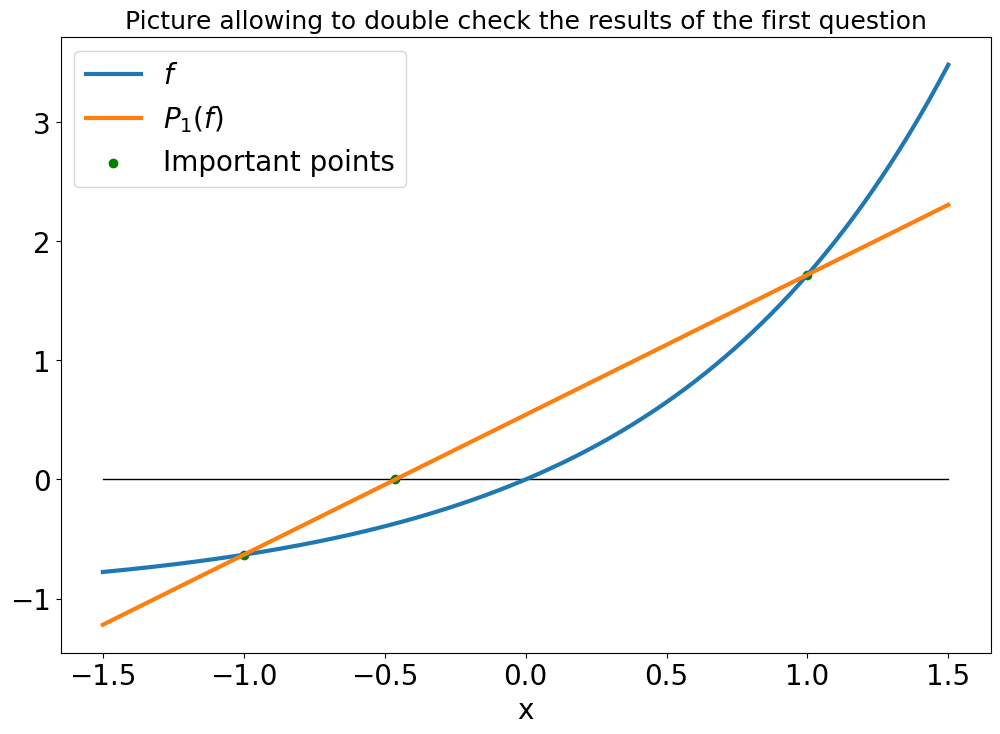

In [2]:
def f(x):
    return np.exp(x) - 1

x0 = 1
x1 = -1
x2 = (x1*f(x0)-x0*f(x1)) / (f(x0)-f(x1))

def P1f(x):
    return (x-x0)/(x1-x0)*f(x1) + (x-x1)/(x0-x1)*f(x0)

X = np.linspace(-1.5,1.5,1000) # the points at which the functions will be evaluated and plotted

plt.figure(figsize = (12,8))
plt.plot(X, 0*X,  color='black', linewidth=1) # the x axis
plt.plot(X, f(X), linewidth=3, label='$f$') # graph of f
plt.plot(X, P1f(X), linewidth=3, label='$P_1(f)$') # graph of P1f
plt.scatter(np.array([x0,x1,x2]), np.array([f(x0),f(x1),0]), color='green', label='Important points') # important points
plt.xlabel('x',fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)
plt.title('Picture allowing to double check the results of the first question', fontsize=18)
plt.show()

<div  markdown=1 class="Def">


**First new rootfinding algorithm.** 
Given $x_0,x_1\in(a,b)$, we now construct recursively a sequence $(x_k)$ which constitues our first rootfinding algorithm. For $k\geq 1$, consider the Lagrange interpolation polynomial $P$ of $f$ at the two nodes $x_{k-1}$ and $x_{k}$, and define $x_{k+1}$ as the root of $P$. 
*Note: This sequence $(x_k)$ may or may not be well-defined (for instance, $P$ could not have any root) but you do not need to worry about this here.*

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pt</span>

Give a formula for $x_{k+1}$ ($k\geq 1$), in terms of $x_{k-1}$, $x_{k}$, $f(x_{k-1})$ and $f(x_{k})$, by generalizing the one you obtained for $k=1$ in the first question (no justification needed).

<div  markdown=1 class="Answer"> 

$x_{k+1} = \frac{x_{k} f(x_{k-1}) - x_{k-1}f(x_{k})}{f(x_{k-1})-f(x_{k})}$.

Provided $x_0$ and $x_1$ are close enough to the zero $x^*$ of $f$, we hope that this sequence $(x_k)$ may converge to $x^*$. In order to implement this algorithm, we need a stoping criterion.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 1pt</span>

Propose a suitable stopping criterion.

<div  markdown=1 class="Answer"> 

Since we are looking for a zero of $f$, we can decide to stop as soon as $\vert f(x_k)\vert \leq \varepsilon$, for some treshold $\varepsilon$ fixed by the user. Conditions like $\vert x_k - x_{k-1} \vert \leq \varepsilon$, or $\frac{\vert x_k - x_{k-1} \vert}{\vert x_k\vert} \leq \varepsilon$, are fine as well.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 6pts</span>

Complete the cell below so that it implements the **first new rootfinding algorithm** using the sequence $(x_k)$ defined above.

In [3]:
def rootfinding_degree_1(f, x0, x1, k_max, eps):
    """
    New rootfinding algorithm based on degree one interpolation
    -----------------------
    Inputs: 
    f : name of the function
    x0, x1: initial data
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k generated by the new rootfinding algorithm
    """
       
    x = np.zeros(k_max+1)     # create vector x of zeros with size k_max+1
    x[0:2] = [x0, x1]    # initialize the vector x with x0 and x1
    k = 1                 # initialize k
    while  np.abs(f(x[k])) > eps  and  k < k_max : 
        x[k+1] = (x[k]*f(x[k-1]) - x[k-1]*f(x[k])) / (f(x[k-1]) - (f(x[k])))
        k = k+1
    return x[:k+1] #removes the extra zeros and outputs only the computed x_k's

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

In the cell below, use the function `rootfinding_degree_1` you just implemented, on the function $f(x) = \exp(x)-1$, with $x_0=1$ and $x_1=0.5$, in order to try an approximate the zero $x^* = 0$ of $f$. In an appropriate scale, plot the error for the different iterates.

xstar = 0
x = [ 1.00000000e+00 -1.00000000e+00 -4.62117157e-01  2.97393757e-01
 -6.97952902e-02 -9.96804917e-03  3.52505926e-04 -1.75971327e-06
 -3.10136512e-10  2.32735495e-16]


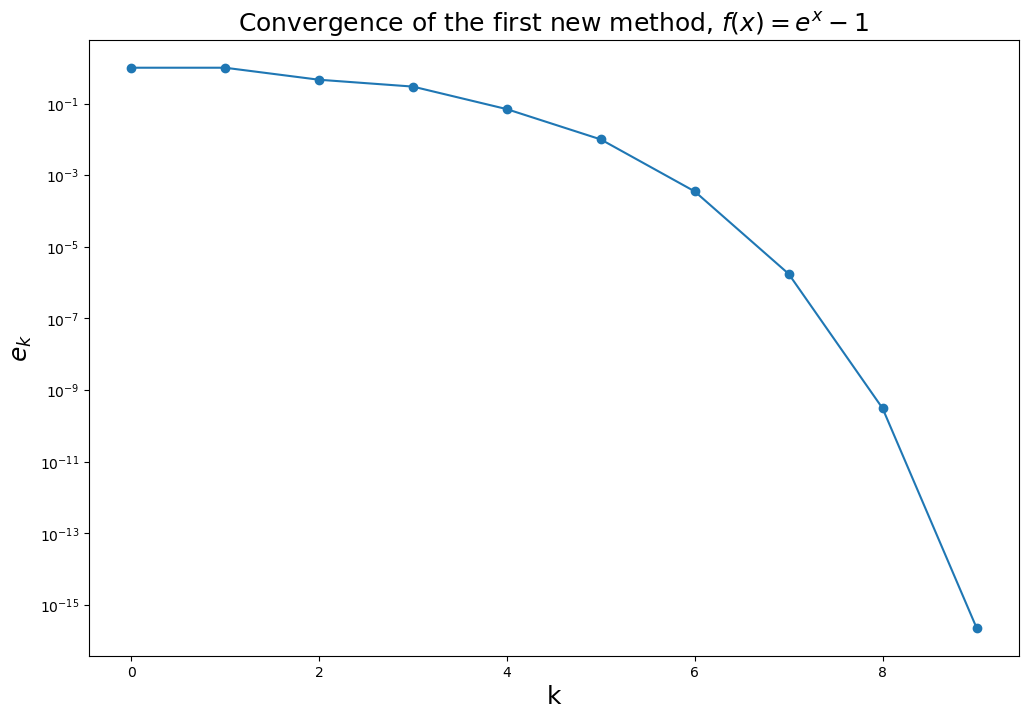

In [4]:
xstar = 0

# parameters
x0 = 1
x1 = -1
k_max = 100
eps = 1e-15

# compute the iterations of the first new rootfinding algorithm
x = rootfinding_degree_1(f, x0, x1, k_max, eps)

#print x^* and x
print('xstar =', xstar)
print('x =', x)

# compute the error
err = np.abs(x-xstar)

# create the vector tabk : tabk[k]=k for each iteration made
tabk = np.arange(0, err.size)

# plot the error versus k
fig = plt.figure(figsize=(12, 8))
plt.plot(tabk, err, marker="o")
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of the first new method, $f(x)=e^x-1$', fontsize=18)
plt.show()

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

Use another appropriate plot, or the function `polyfit` from numpy, in order to estimate the order of convergence of this first new method. Explain your answer in the cell anwser below.

alpha approximately equal to  1.6277484209790165


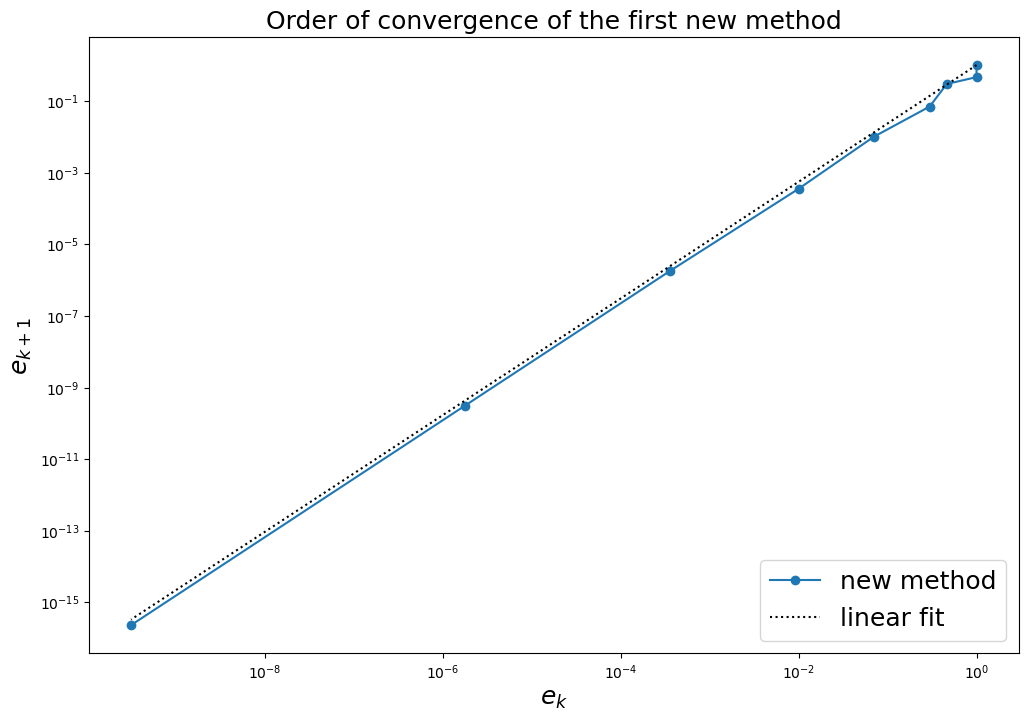

In [5]:
ab = np.polyfit(np.log(err[:-1:]), np.log(err[1:]), 1) #Finding the coefficients of the line which better fits the data
alpha = ab[0] # the slope
print("alpha approximately equal to ", alpha)

fig = plt.figure(figsize=(12, 8))
plt.loglog(err[:-1:], err[1:], marker="o", label="new method") #log-log scale
plt.loglog(err[:-1:], err[:-1:]**alpha,':k',label='linear fit')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence of the first new method', fontsize=18)

plt.show()

<div  markdown=1 class="Answer"> 

We want to find $\alpha$ such that $e_{k+1} \approx C e_k^\alpha$, i.e., $\log e_{k+1} \approx \alpha \log e_k + \log C$. Using polyfit to approximate $\alpha$ from the data, we get $\alpha \approx 1.6$. Alternatively, one can find an approximate value of $\alpha$ by plotting $e_{k+1}$ versus $e_k$ in log-log scale, and trying to find the slope better fitting the obtained curve. *In fact, one can prove that, for this new rootfinding algorithm, the order of convergence is equal to the golden ration $\frac{1+\sqrt{5}}{2} \approx 1.62$, but this goes beyond the scope of this exam.*

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Starting from the general formula for $x_{k+1}$ obtained above, rewrite $x_{k+1}$ as $x_{k+1} = x_{k} - d_k$ (say what $d_k$ is).

<div  markdown=1 class="Answer"> 

We have
\begin{align}
x_{k+1} - x_k &= \frac{x_{k} f(x_{k-1}) - x_{k-1}f(x_{k})}{f(x_{k-1})-f(x_{k})} - \frac{x_{k}(f(x_{k-1})-f(x_{k}))}{f(x_{k-1})-f(x_{k})} \\
&= \frac{x_{k}-x_{k-1}}{f(x_{k-1})-f(x_{k})}f(x_{k}),
\end{align}
therefore
\begin{equation}
d_k = \frac{x_{k}-x_{k-1}}{f(x_{k})-f(x_{k-1})}f(x_{k}).
\end{equation}

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Can you relate this new algorithm to one of the main rootfinding algorithms we have seen in the course? How do they compare (try to give pros and cons)?

<div  markdown=1 class="Answer"> 

The new algorithm writes

\begin{equation}
x_{k+1} = x_k - \frac{x_{k}-x_{k-1}}{f(x_{k})-f(x_{k-1})}f(x_{k}),
\end{equation}

and is reminiscent of Newton's method given by

\begin{equation}
x_{k+1} = x_k - \left( f'(x_k)\right)^{-1}f(x_{k}).
\end{equation}

In the new algorithm, the derivative $f'(x_k)$ is approximated by $\frac{f(x_{k})-f(x_{k-1})}{x_{k}-x_{k-1}}$. *This new algorithm has in fact a name, and is called the secant method, but this was of course not asked.*

An advantage of the new method is that it only requires evaluating $f$ itself, whereas Newton's method also needs $f'$ (so $f$ has to be differentiable, and one has to be able to evaluate the derivative). A disadvantage of the new method is that its order of convergence (which seems close to 1.5) is lower than the order of convergence of Newton method's (which is 2).

### I.2) Using interpolation of arbitrary degree

The starting point of the method introduced in the previous section was to replace $f$ by its interpolation polynomial of degree one. We now generalize it by using an interpolation polynomial of potentially higher degree.

<div  markdown=1 class="Def"> 

**Second new rootfinding algorithm.**
Given an integer $n\geq 1$, and $x_0,x_1,\ldots,x_n\in(a,b)$, we now construct recursively a sequence $(x_k)$ which constitues our second rootfinding algorithm. For $k\geq n$, consider the Lagrange interpolation polynomial $P$ of $f$ at the $n+1$ nodes $x_{k-n},x_{k-n+1},\ldots,x_{k}$, and define $x_{k+1}$ as the root of $P$ that is the closest to $x_k$. 
*Note: This sequence $(x_k)$ may or may not be well-defined (for instance, $P$ could have multiple roots that are at an equal distance of $x_k$), or may generate complex numbers, but you do not need to worry about this here.*

For $n=1$, this is the same algorithm as the **first new rootfinding algorithm** introduced before. For $n=2$, one could in principle write down explicit formula for $x_{k+1}$ in terms of $x_k$, $x_{k-1}$ and $x_{k-2}$, but things become rather messy. Therefore, for any $n\geq 1$, we are instead going to construct numerically the interpolation polynomial, and then use a built-in python function to find numerically all the roots of a given polynomial.

We recall below the function `interpVDM`, which we have seen in the course. Given interpolation nodes $x=(x_0,\ldots,x_n)$ and values $y=(y_0,\ldots,y_n)$, this function returns the coefficients $a=(a_0,\ldots,a_n)$ of the Lagrange interpolation polynomial $P$ associated to this data:

\begin{equation}
P(X) = a_0 X^n + a_1 X^{n-1} + \ldots + a_{n-1} X + a_n.
\end{equation}

In [6]:
def interpVDM(x,y):
    """
    Computation of the coefficients of the interpolation polynomial in the monomial basis, using a Vandermonde matrix
    -----------------------
    Inputs: 
    x : the interpolation nodes (1D array with pairewise distinct entries)
    y : the prescribed values at the interpolation nodes (1D array having the same size as x)
    
    Output: 
    a : the coefficients of the interpolation polynomial in the monomial basis (1D array having the same size as x)
    """
    # Construct the Vandermonde matrix 
    M = np.vander(x)
    # Solve the linear system
    a = np.linalg.solve(M, y)
    return a

Given a numpy array $a=(a_0,\ldots,a_n)$ representing the polyonmial

\begin{equation}
P(X) = a_0 X^n + a_1 X^{n-1} + \ldots + a_{n-1} X + a_n,
\end{equation}

the function `np.roots` can be used to produce another numpy array containing all the roots of $P$. An example is given below.

In [7]:
a = np.array([1,0,-2]) # this represents the polynomial X^2 - 2
r = np.roots(a) # approximation of all the roots of X^2 - 2
print(r)

[ 1.41421356 -1.41421356]


<div  markdown=1 class="DoIt"> <span style="color:blue"> 6pts</span>

Complete the cell below so that it implements the **second new rootfinding algorithm** using the sequence $(x_k)$ defined above. *You may use `np.argmin` to find the index of the minimal element in a numpy array.*

In [8]:
def rootfinding_degree_n(f, n, xinit, k_max, eps):
    """
    New rootfinding algorithm based on degree one interpolation
    -----------------------
    Inputs: 
    f : name of the function
    n : integer (we use the last n+1 points to approximate f)
    xinit: a numpy array [x0,...,xn] containing the initial data
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k generated by the new rootfinding algorithm
    """
       
    x = np.zeros(k_max+1) # create vector x of zeros with size k_max+1
    x[0:n+1] = xinit # put the initial conditions inside x
    k = n  # initialize k
    while  np.abs(f(x[k])) > eps  and  k < k_max : 
        a = interpVDM(x[k-n:k+1], f(x[k-n:k+1])) # compute the relevant interpolation polynomial
        r = np.roots(a) # compute the roots of that polynomial
        index = np.argmin(np.abs(r-x[k])) # find where the closest root to x[k] is
        x[k+1] = r[index] # define x[k+1]
        k = k+1
    return x[:k+1] #removes the extra zeros and outputs only the computed x_k's

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

In the cell below, test the function `rootfinding_degree_n` you just implemented, with $n=1$, on the function $f(x) = \exp(x)-1$, with $x_0=1$ and $x_1=-1$, and check that you get essentially the same output as with the function `rootfinding_degree_1`.

In [9]:
# parameters
x0 = 1
x1 = -1
k_max = 100
eps = 1e-15

# compute the iterations of the second new rootfinding algorithm, with n=1
xinit = np.array([x0, x1])
n = 1
x_degree_n = rootfinding_degree_n(f, n, xinit, k_max, eps)

# compute the iterations of the first new rootfinding algorithm
x_degree_1 = rootfinding_degree_1(f, x0, x1, k_max, eps)


print("The maximal difference between the output of the two algorithms is: ",np.max(np.abs(x_degree_1-x_degree_n)))

The maximal difference between the output of the two algorithms is:  8.276563117483882e-17


<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

In the cell below, use the function `rootfinding_degree_n`, this time with $n=2$, on the function $f(x) = \exp(x)-1$, with $x_0=1$, $x_1=-1$ and $x_2=-0.5$, in order to try an approximate the zero $x^* = 0$ of $f$. In an appropriate scale, plot the error for the different iterates.

xstar = 0
x = [ 1.00000000e+00 -1.00000000e+00 -5.00000000e-01 -6.80472210e-02
  4.17882354e-03 -2.07644215e-05 -9.68535158e-10 -3.07406950e-17]


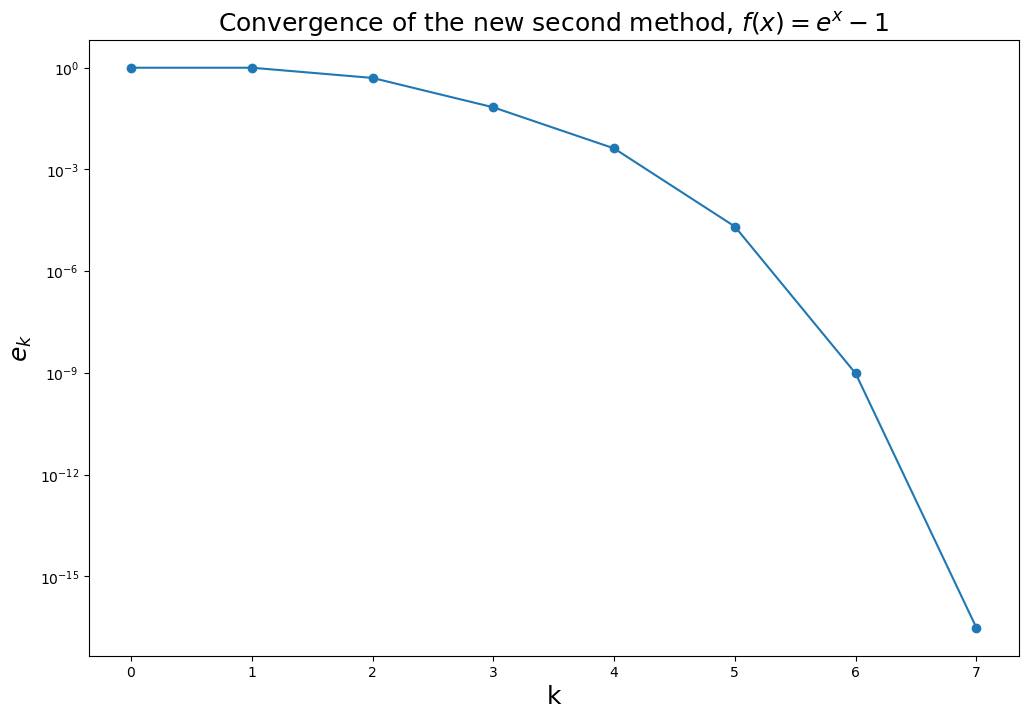

In [10]:
xstar = 0

# parameters
n = 2
xinit = np.array([1, -1, -0.5])
k_max = 100
eps = 1e-15

# compute the iterations of the first new rootfinding algorithm
x = rootfinding_degree_n(f, n, xinit, k_max, eps)

#print x^* and x
print('xstar =', xstar)
print('x =', x)

# compute the error
err = np.abs(x-xstar)

# create the vector tabk : tabk[k]=k for each iteration made
tabk = np.arange(0, err.size)

# plot the error versus k
fig = plt.figure(figsize=(12, 8))
plt.plot(tabk, err, marker="o")
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of the new second method, $f(x)=e^x-1$', fontsize=18)
plt.show()

<div  markdown=1 class="DoIt"> <span style="color:blue"> 3pts</span>

Use another appropriate plot, or the function `polyfit` from numpy, in order to estimate the order of convergence of this second new method.

alpha approximately equal to  1.8088393572209513


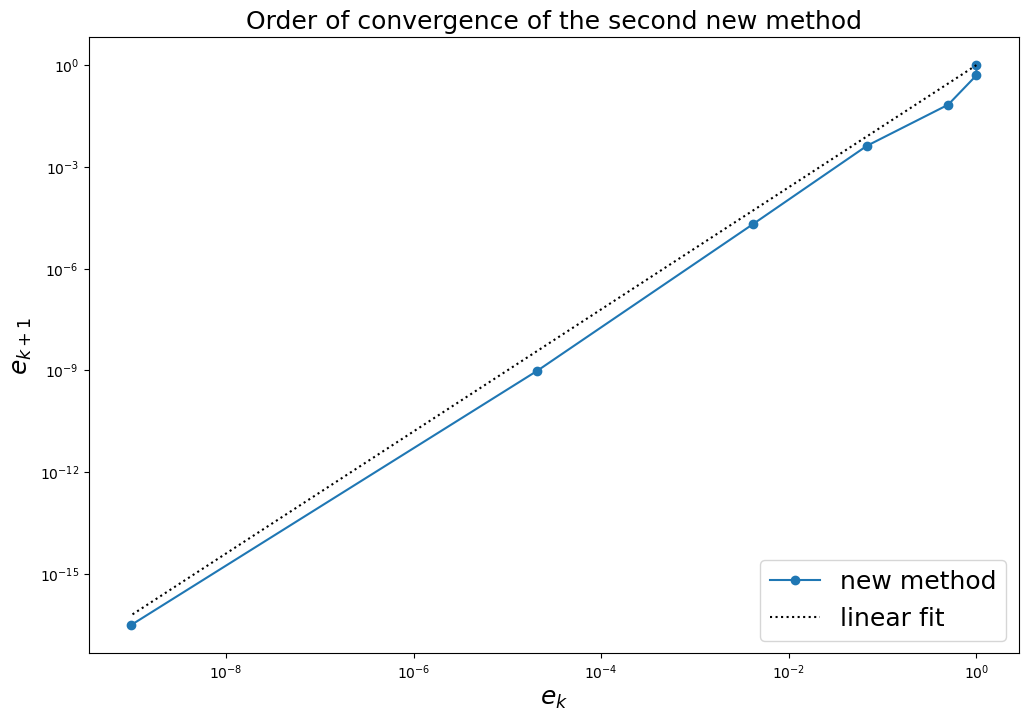

In [11]:
ab = np.polyfit(np.log(err[:-1:]), np.log(err[1:]), 1) #Finding the coefficients of the line which better fits the data
alpha = ab[0] # the slope
print("alpha approximately equal to ", alpha)

fig = plt.figure(figsize=(12, 8))
plt.loglog(err[:-1:], err[1:], marker="o", label="new method") #log-log scale
plt.loglog(err[:-1:], err[:-1:]**1.8,':k',label='linear fit')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence of the second new method', fontsize=18)

plt.show()

<div  markdown=1 class="Answer"> 

We want to find $\alpha$ such that $e_{k+1} \approx C e_k^\alpha$, i.e., $\log e_{k+1} \approx \alpha \log e_k + \log C$. Using polyfit to approximate $\alpha$ from the data, we get $\alpha \approx 1.8$. *In fact, one can prove that, for this new rootfinding algorithm with $n=2$, the order of convergence is approximately equal to $1.84$, but this goes beyond the scope of this exam.*

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

How does the second rootfinding algorithm, with $n=2$, compare to the first one (which corresponds to the $n=1$ case)?

<div  markdown=1 class="Answer"> 

The $n=2$ case seems better, as it has a slightly higher order of convergence.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Would you recommend using this second rootfinding algorithm with a much larger value of $n$? Explain.

<div  markdown=1 class="Answer"> 

On the theoretical side, we have seen in the course that increasing the number of interpolation nodes does not necessarily mean that the interpolation polynomial approximates the function better and better, except if the nodes are well chosen (for instance, with Chebyshev nodes). Here, we do not control how the nodes are distributed, therefore increasing $n$ to much may not be a good idea.

On the practical side, taking $n$ much larger also means that we need way more initial points. (This is in fact not a major obstacle, as one could always start with only two initial points, and build the next ones by gradually increasing $n$ from $1$ to its target value.). Moreover, as soon as $n>1$, we run the risk of getting complex roots for the interpolation polynomial, and therefore to converge to a complex root of $f$. Whether this is a good or a bad thing depends on the problem at hand.

With much larger values of $n$, one should also think about how expensive it actually is to approximate all the roots of the interpolation polynomials, but this would require understanding the algorithms used in `np.roots`, which is beyond the scope of this exam.

*In order to get the $2$ points awarded to this question, you only needed to mention that the interpolation polynomial may not necessarily better approximate the function when $n$ increases.*

<a id="quad"></a>
## II) Approximation of integrals

In this entire section, $f$ denotes a continuous map from an interval $[a,b]$ to $\mathbb{R}$.

### II.1) The composite trapezoidal rule versus the elementary Gauss-Legendre rule

We recall that, given an integer $m\geq 1$ and a uniform subdivision of $[a,b]$ described by the points $t_j = a + j\frac{b-a}{m}$, $j=0,\ldots,m$, the composite trapezoidal rule that approximates $\int_a^b f(x) dx$ is given by

\begin{align}
\sum_{j=0}^{m-1} \frac{b-a}{m} \frac{f(t_j)+f(t_{j+1})}{2} = \frac{b-a}{m} \left(\sum_{j=1}^{m-1} f(t_j) + \frac{f(a)+f(b)}{2}\right).
\end{align}

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Complete the function below so that it computes the composite trapezoidal rule (with a uniform subdivision as above).

In [12]:
def composite_trapezoidal_rule(f,a,b,m):
    """
    Approximate integral using the composite trapezoidal rule
    -----------------------------------------
    Inputs :
    f: function to be integrated
    a,b: the end-points of the interval on which the integral has to be computed
    m: the number of subintervals in the uniform subdivision of [a,b]
    
    Output :
    the value of the composite trapezoidal rule applied to f on [a,b]
    """
    x = np.linspace(a,b,m+1) # the uniform mesh with m subintervals
    return (b-a)/m * (np.sum(f(x))-(f(a)+f(b))/2)

<div  markdown=1 class="Def">

In this exam, we denote by $E^{trap}_m(f)$  the error between $\int_a^b f(x)dx$ and the approximate value provided by the composite trapezoidal rule with $m$ subintervals.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

- Given an infinitely differentiable function $f$ on $[a,b]$, can we get an upper-bound for $E^{trap}_m(f)$ of the form
$$
E^{trap}_m(f) \leq c \frac{1}{m^\gamma}  \quad{}\text{or equivalently}\quad{} E^{trap}_m(f) \leq \tilde{c} h^\gamma,\ \text{ with } h = \frac{b-a}{m},
$$
where $c$ (or equivalently $\tilde{c}$) is a constant which may depend on $f$, $a$ and $b$ but not on $m$? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).
- According to the course, what is the largest value of $\gamma$ one can have in the above estimate (which holds for every infinitely differentiable function $f$ on $[a,b]$)? Explain where this value comes from.


<div  markdown=1 class="Thm"> (copy and paste the relevant theorem here)

**Convergence of composite quadrature rules.** Consider an interval $[a,b]$, a set of $m+1$ mesh points $(t_j)_{0\leq j\leq m}$ such that $a = t_0 < t_1 < \ldots < t_m = b$, an integer $n$, and a composite quadrature rule of the form 

$$
\int_a^b f(x)dx = \sum_{j=0}^{m-1} \int_{t_j}^{t_{j+1}} f(x)dx  \approx \sum_{j=0}^{m-1} I^n_{[t_j,t_{j+1}]}(f).
$$

If the elementary quadrature rule used on each subinterval $[t_j,t_{j+1}]$ is of order of accuracy at least $n_a$, and $f\in{\cal C}^{n_a+1}([a,b])$, then there exists a constant $C$ (independent of $m$), such that the error is bounded as follows:

$$
E_m(f) \leq C \sup_{x\in [a,b]} \left\vert \,f^{(n_a+1)}(x)\,\right\vert (b-a) \, h^{n_a+1},
$$

where we recall that 

$$h = \max_{j=0,\ldots,m-1} \left\vert t_{j+1} - t_j \right\vert.$$

<div  markdown=1 class="Answer"> 

Yes, such a bound is provided by the above theorem. We indeed get an estimate of the form $E^{trap}_m(f) \leq c \frac{1}{m^\gamma}$, where $\gamma=n_a+1$, $n_a$ being the order of accuracy of the elementary quadrature rule used on each subinterval.

We have seen in the course that $n_a=1$ for the trapezoidal rule, hence we get $\gamma=2$.

We provide below a function that approximates $\int_a^b f(x) dx$ using the elementary Gauss-Legendre rule of degree $m$ (that is, with $m+1$ nodes given by the roots of the Legendre polynomial $Q_m$).

In [13]:
def coeffs_GaussLegendre(m):
    """
    computation of the nodes and weights for the Gaussian (or Gauss-Legendre) quadrature rule at any order,
    for the interval [-1,1]
    ---------------------------------
    Inputs :
    m: degree of the rule (we want m+1 nodes)
    
    Outputs:
    x, w: 1D array containing the nodes and the weights (for the interval [-1,1])
    """
    return roots_legendre(m+1)

def elementary_GaussLegendre_rule(f,a,b,m):
    """
    Approximate integral using the elementary Gauss-Legendre rule
    -----------------------------------------
    Inputs :
    f: function to be integrated
    a,b: the end-points of the interval on which the integral has to be computed
    m: the degree of the elementary Gauss-Legendre rule
    
    Output :
    the value of the elementary Gauss-Legendre rule applied to f on [a,b]
    """
    nodes, weights = coeffs_GaussLegendre(m) # nodes and weights for the interval [-1,1]
    nodes_rescaled = a+(nodes+1)*(b-a)/2 # nodes rescaled for the interval [a,b]
    weights_rescaled = weights*(b-a)/2 # weights rescaled for the interval [a,b]
    return np.sum(f(nodes_rescaled)*weights_rescaled) # applying the elementary quadrature rule

<div  markdown=1 class="Def">

In this exam, we denote by $E^{GL}_m(f)$  the error between $\int_a^b f(x)dx$ and the approximate value provided by the elementary Gauss-Legendre rule of degree $m$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 1pt </span>

- Given a continous function $f$ on $[a,b]$, according to the course, what can we say regarding $E^{GL}_m(f)$ when $m$ goes to infinity?

<div  markdown=1 class="Answer"> 

We have seen that the elementary Gauss-Legendre rule applied to any continuous function converges toward the exact integral, that is, $E^{GL}_m(f)\to 0$ when $m\to\infty$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts </span>

Neglecting the cost of computing the nodes and the weights for the Gauss-Legendre quadrature (one can assume that those have been pre-computed before), and counting only the number of required evaluations of $f$, how do the cost of the compositive trapezoidal rule with $m$ subintervals and the cost of the elementary Gauss-Legendre rule of degree $m$ compare?

<div  markdown=1 class="Answer"> 

They have comparable costs, as they both require evaluating the function $f$ at $m+1$ points.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 8pts</span>

Consider the interval $[a,b]=[0,\pi/2]$, and the function $g:t\mapsto \frac{\cos(t+\pi/3)}{t+1}$. 

- Complete the cell below in order to compute $E^{trap}_m(g)$ and $E^{GL}_m(g)$,for $m$ between $1$ and $100$. In order to compute the error, you can use without justification that the value of the $\int_0^{\pi/2} g(t) dt$ is approximately $I = -0.114416807522863$
- Plot the two errors on the same graph, in an appropriate scale, and comment upon what you observe.

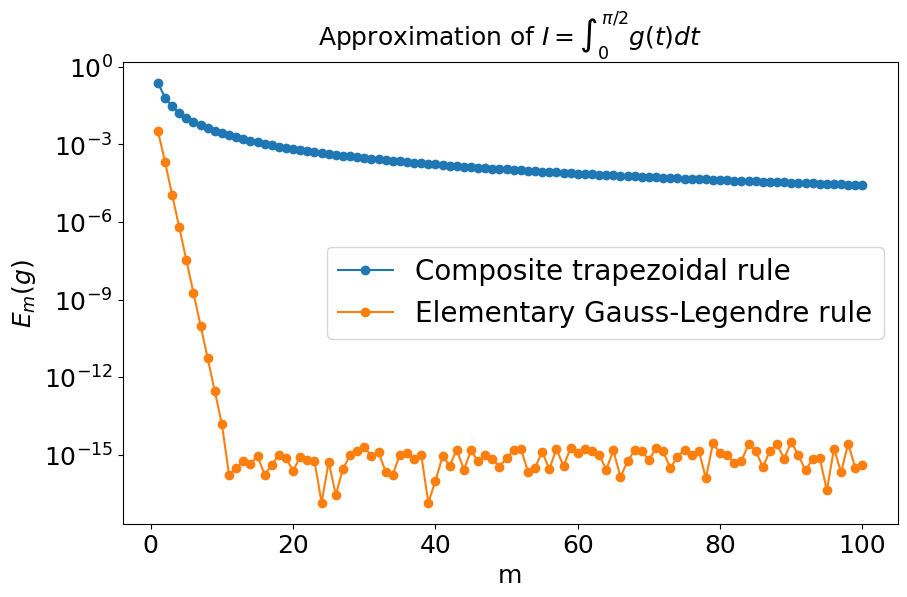

In [14]:
def g(t): 
    return np.cos(t+pi/3) / (t+1)
I = -0.114416807522863 # The almost exact value of the intergral

m_max = 100
tab_m = np.arange(1, m_max+1)
tab_Im_trap = np.zeros(m_max) # Array in which we will store the output of the composite trapezoidal rule for different values of m
tab_Im_GL = np.zeros(m_max) # Array in which we will store the output of the elementary Gauss-Legendre rule for different values of m

# computation of the approximated value of the integral for m = 0,...,m_max
for m in tab_m:
    tab_Im_trap[m-1] = composite_trapezoidal_rule(g, 0, pi/2, m)
    tab_Im_GL[m-1] = elementary_GaussLegendre_rule(g, 0, pi/2, m)
    
# computation of the error
tab_Em_trap = np.abs(tab_Im_trap - I)
tab_Em_GL = np.abs(tab_Im_GL - I)

# plot
fig = plt.figure(figsize=(10, 6))
plt.plot(tab_m, tab_Em_trap, marker="o", label="Composite trapezoidal rule")
plt.plot(tab_m, tab_Em_GL, marker="o", label="Elementary Gauss-Legendre rule")
plt.xlabel('m', fontsize = 18) 
plt.ylabel('$E_m(g)$', fontsize = 18)
plt.title('Approximation of $I=\int_0^{\pi/2} g(t) dt$', fontsize = 18) 
# plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 18)
plt.show()

<div  markdown=1 class="Answer"> 

The convergence is much faster for the elementary Gauss-Legendre rule than for the composite trapezoidal rule. For the elementary Gauss-Legendre rule, the error saturates around $10^{-15}$, probably because of rounding errors. *Using a log-scale for the y-axis was expected here. Regarding the x-axis, using or not using a log-scale were both fine (each one is more appropriate for one of the two error curves).*

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

We still consider the same example: $[a,b]=[0,\pi/2]$, and $g:t\mapsto \frac{\cos(t+\pi/3)}{t+1}$, but here only on the composite trapezoidal rule. 

- Reproduce the previous convergence graph, with only the error for composite trapezoidal rule, and change the scale if necessary in order to best study how fast $E^{trap}_m(g)$ goes to zero.
- Adding things on the graph or using other means, study how $E^{trap}_m(g)$ actually behaves with respect to $m$. How does this compare to the theoretical upper-bound you obtained in the second question of part **II.1)**? What type of convergence (sublinear, linear, quadratic ...) does this correspond to?

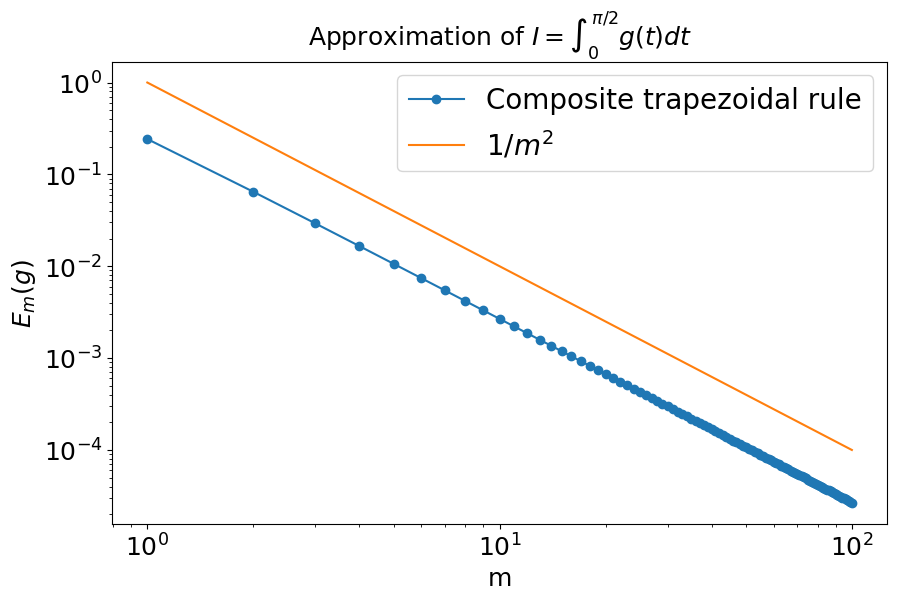

Composite mid-point rule, approximation of gamma: 1.9932086135510005


In [19]:
# Graphical study
fig = plt.figure(figsize=(10, 6))
plt.plot(tab_m, tab_Em_trap, marker="o", label="Composite trapezoidal rule")
plt.plot(tab_m, 1/tab_m**2, label="$1/m^2$")
plt.xlabel('m', fontsize = 18) 
plt.ylabel('$E_m(g)$', fontsize = 18)
plt.title('Approximation of $I=\int_0^{\pi/2} g(t) dt$', fontsize = 18) 
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 18)
plt.show()

# Numerical study using np.polyfit
ab = np.polyfit(np.log(tab_m), np.log(tab_Em_trap), 1) 
gamma = -ab[0]
print("Composite mid-point rule, approximation of gamma:",gamma)

<div  markdown=1 class="Answer"> 

From the theoretical error bounds, we expect the error to behave like $E^{trap}_m(g)\approx \frac{c}{m^2}$, which yields $\log(E^{trap}_m(g))\approx -2\log(m) + \log(c)$. We can therefore use a log-scale on both axis, or use find a best linear fit between $\log(m)$ and $\log(E^{trap}_m(g))$, in order to confirm this conjecture, and we indeed get that the error behaves like $\frac{c}{m^2}$. In order word, the $\frac{1}{m^2}$ error bound is sharp. The convergence is sublinear, as $\frac{E^{trap}_{m+1}(g)}{E^{trap}_m(g)}\to 1$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

We still consider the same example: $[a,b]=[0,\pi/2]$, and $g:t\mapsto \frac{\cos(t+\pi/3)}{t+1}$, but here only using the elementary Gauss-Legendre rule. 

- Reproduce the previous convergence graph, with only the error for elementary Gauss-Legendre rule, and change the scale if necessary in order to best study how fast $E^{GL}_m(g)$ goes to zero. 
- Adding things on the graph or using other means, study how $E^{GL}_m(g)$ actually behaves with respect to $m$. What type of convergence (sublinear, linear, quadratic ...) does this correspond to?

Elementary Gauss-Legendre rule, approximation of rho: 0.054407925043776444


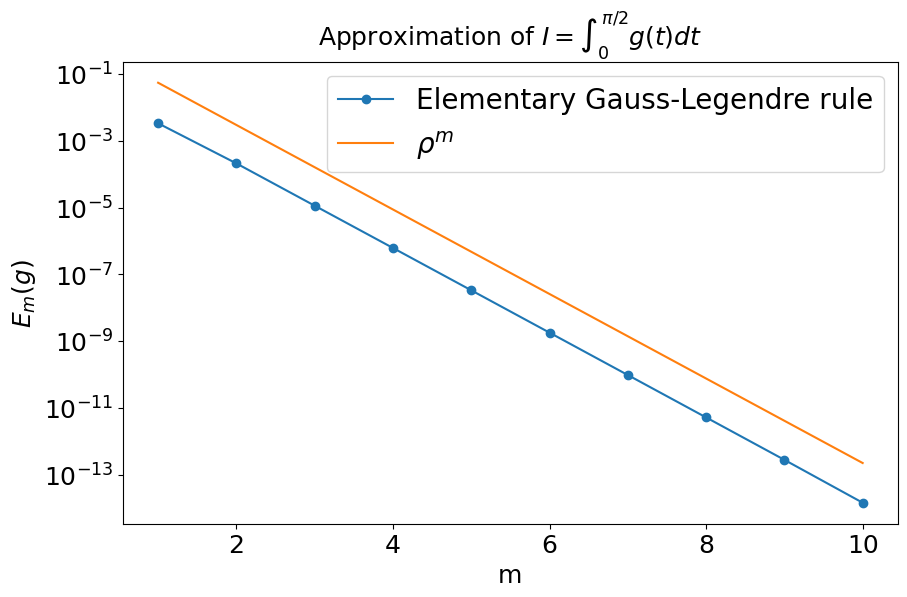

In [22]:
truncation = 10

# Numerical study using np.polyfit
ab = np.polyfit(tab_m[:truncation], np.log(tab_Em_GL[:truncation]), 1) 
rho = np.exp(ab[0])
print("Elementary Gauss-Legendre rule, approximation of rho:",rho)

# Graphical study
fig = plt.figure(figsize=(10, 6))
plt.plot(tab_m[:truncation], tab_Em_GL[:truncation], marker="o", label="Elementary Gauss-Legendre rule")
plt.plot(tab_m[:truncation], rho**tab_m[:truncation], label=r"$\rho^m$")
plt.xlabel('m', fontsize = 18) 
plt.ylabel('$E_m(g)$', fontsize = 18)
plt.title('Approximation of $I=\int_0^{\pi/2} g(t) dt$', fontsize = 18) 
plt.yscale('log')
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 18)
plt.show()



<div  markdown=1 class="Answer"> 

Because of the apparition of rounding errors, we have to keep only the values of $m$ that are not too large. Using a log-scale for the y-axis only, we seem to get a linear graph, which suggests that $\log(E^{GL}_m(g))\approx am+b$, and therefore $E^{GL}_m(g) \approx e^b e^{am} = c\rho^m$, with $\rho = e^a$. Using polyfit, we approximate $a$ and get $\rho \approx 0.05$. The convergence is therefore linear, with a rate $\rho$.

### II.2) Approximating functions involving integrals

Let $G:(0,+\infty)\to\mathbb{R}$ be the function defined by

\begin{equation}
G(x) = \int_0^{\pi/2} \frac{\cos(t+\pi/3)}{t+x} dt.
\end{equation}

This is a continuous function (you do not have to prove it). Our goal will be to approximate this function by using, for any given $x\in (0,+\infty)$ the composite trapezoidal rule or the elementary Gauss-Legendre rule on the map $g_x:t\mapsto \frac{\cos(t+\pi/3)}{t+x}$.

In this entire subsection, we fix $m=10$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Complete the following cell so that, for any given $x\in (0,+\infty)$, `Gtrap` outputs an approximation of $G(x)$ computed with the composite trapezoidal rule, and `GGL` outputs an approximation of $G(x)$ computed with the elementary Gauss-Legendre rule, both for $m=10$.

In [23]:
def Gtrap(x):
    def gx(t):
        return np.cos(t+pi/3) / (t+x)
    return composite_trapezoidal_rule(gx, 0, pi/2, 10)

def GGL(x):
    def gx(t):
        return np.cos(t+pi/3) / (t+x)
    return elementary_GaussLegendre_rule(gx, 0, pi/2, 10)

<div  markdown=1 class="DoIt"> <span style="color:blue"> 0pt</span>

Run the following cell to check that `Gtrap(1)` and `GGL(1)` both give values somewhat close to $-0.1$ (if not, there is a mistake somewhere in your code).

In [24]:
print("Gtrap(1) =",Gtrap(1))
print("GGL(1) =",GGL(1))

Gtrap(1) = -0.11174315932439796
GGL(1) = -0.11441680752287774


Because of the way the functions `composite_trapezoidal_rule` and `elementary_GaussLegendre_rule` were implemented, your functions `Gtrap` and `GGL` may not directly work when the input is an array instead of just a number. An easy way to fix this is to use the command `np.vectorize`, as in the cell below. The new functions `Gtrap_vec` and `GGL_vec` will produce the same output as `Gtrap` and `GGL`, but will also accept arrays as inputs.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 0pt</span>

Run the cell below.

In [ ]:
Gtrap_vec = np.vectorize(Gtrap)
GGL_vec = np.vectorize(GGL)

## Example
print("Gtrap(1) =",Gtrap(1),", Gtrap(2) =",Gtrap(2))
print("Gtrap_vec([1,2]) =",Gtrap_vec([1,2]))
print("Gtrap([1,2]) would have produced an error")
# Gtrap([1,2])

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Using the function `GGL_vec`, plot (an approximation of) the graph of $G$ in the cell below, for $x\in [0,1]$.

In [ ]:
X = np.linspace(0,1,1000) # the points at which the G will be evaluated and plotted

plt.figure(figsize = (12,8))
plt.plot(X, 0*X,  color='black', linewidth=1) # the x axis
plt.plot(X, GGL_vec(X), linewidth=3, label = 'GGL') # graph of G
plt.xlabel('x',fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)
plt.title('Approximation of G using Gauss-Legendre quadrature', fontsize=18)
plt.show()

<div  markdown=1 class="DoIt"> <span style="color:blue"> 9pts</span>

*This question uses some rootfinding algorithms from the first part of the exam. If you did not manage to get any of them to work, you can use here the bisection method instead (copying the code for the bisection given in the notebook of Chapter 1).*

Take $x_0=0.1$, $x_1=0.5$ and use the function `rootfinding_degree_1` from the first part of the exam (or equivalently, use `rootfinding_degree_n` with $n=1$), in order to find the zero of `Gtrap` (you may want to use the function `Gtrap_vec` instead of `Gtrap`). Compute the error at each step, by pretending the last iterate that you obtained is the exact solution.

Do the same thing for the function `GGL` (using `GGL_vec`), and plot both errors on the same graph, in a appropriate scale.

Which algorithm would you use in practice to find a zero of the function $G$, and why? Provide a value for the approximate zero of $G$.

In [ ]:
# parameters
x0 = 0.1
x1 = 0.5
k_max = 100
eps = 1e-15

# approximating the zero of Gtrap
x_trap = rootfinding_degree_1(Gtrap_vec, x0, x1, k_max, eps)
x_trap_star = x_trap[-1]

# approximating the zero of GGL
x_GL = rootfinding_degree_1(GGL_vec, x0, x1, k_max, eps)
x_GL_star = x_GL[-1]

# compute the errors
err_trap = np.abs(x_trap-x_trap_star)
err_GL = np.abs(x_GL-x_GL_star)

# create the vector tabk : tabk[k]=k for each iteration made
tabk_trap = np.arange(0, err_trap.size)
tabk_GL = np.arange(0, err_GL.size)

# plot the error versus k
fig = plt.figure(figsize=(12, 8))
plt.plot(tabk_trap, err_trap, marker="o", label="Gtrap")
plt.plot(tabk_GL, err_GL, marker="o", label="GGL")
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.legend(fontsize = 20)
plt.title('Convergence of the first new method for both functions', fontsize=18)
plt.show()

print("xstar =",x_GL_star)

<div  markdown=1 class="Answer"> 

In both cases, the rootfinding algorithm seems to converge at roughly the same speed. However, we saw in the previous part that, for a fixed $m$, the elementary Gauss-Legendre rule approximated integrals much better than the composite trapezoidal rule. In particular, we expect the map $GGL$ to be a much better approximation of $G$ than $Gtrap$, therefore the zero of $G$ should be closer to the zero of $GGL$ than to the one of $Gtrap$. We therefore pick the output of the rootfinding algorithm applied to $GGL$ as our approximate zero of $G$, which gives $x^* \approx 0.23134239615913946$.

# END

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()